In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df

,Date,Price
0,1/3/2002,3835.000000
1,1/4/2002,3835.000000
2,1/5/2002,3835.000000
3,1/6/2002,3835.000000
4,1/7/2002,3835.000000
...,...,...
7455,6/2/2022,4051.000000
7456,6/3/2022,4050.000000
7457,6/4/2022,4050.333333
7458,6/5/2022,4050.666667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7460 entries, 0 to 7459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7460 non-null   object 
 1   Price   7460 non-null   float64
dtypes: float64(1), object(1)
memory usage: 116.7+ KB


In [5]:
df.describe()

,Price
count,7460.000000
mean,4025.192599
std,91.388367
min,3835.000000
25%,3996.500000
50%,4042.358333
75%,4077.000000
max,4266.000000


In [6]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

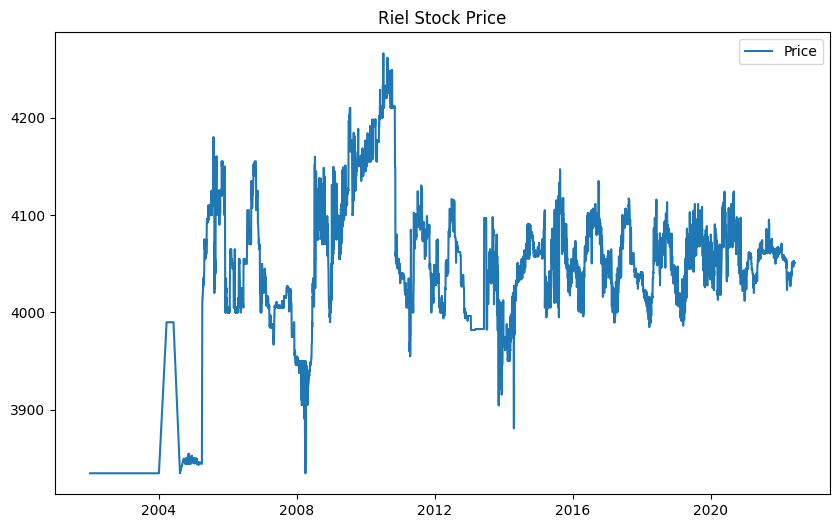

In [7]:
plt.figure(figsize=(10,6))
plt.title('Riel Stock Price')
plt.plot(df2.Price,label='Price')
plt.legend()
plt.show()

## ARIMA Model

In [8]:
data = list(df2["Price"])

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.265835948112034
2. P-Value :  0.016476408530292076
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression: 7430
5. Critical Values :
	 1% :  -3.4312304253914205
	 5% :  -2.861929080831393
	 10% :  -2.56697710337307


In [10]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [12]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

7360 100


In [13]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=57261.498, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57953.261, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57488.603, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57362.625, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57951.306, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=57263.923, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57262.921, Time=1.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=57266.109, Time=1.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=57263.357, Time=4.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57269.434, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=57263.191, Time=2.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=57262.764, Time=1.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=57263.672, Time=3.74 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=57259.673, Time=1.86 sec
 ARIMA(1,1,2)(0,0,0

In [14]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,2,1))

In [15]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7460
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -28694.164
Date:                Wed, 24 May 2023   AIC                          57396.328
Time:                        22:51:30   BIC                          57423.996
Sample:                             0   HQIC                         57405.832
                               - 7460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2741      0.004    -61.088      0.000      -0.283      -0.265
ar.L2         -0.1135      0.005    -21.188      0.000      -0.124      -0.103
ma.L1         -1.0000      0.025    -40.767      0.000      -1.048      -0.952
sigma2       128.4611      3.222     39.874      0.000     122.147     134.775
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):            172142.70
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.12
Prob(H) (two-sided):                  0.41   Kurtosis:                        26.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([4055.92815282, 4056.04168065, 4056.04167497, 4055.31566638,
       4052.93343922, 4054.54987184, 4053.24204507, 4052.54214386,
       4051.42841585, 4050.42822139, 4050.88003254, 4048.74913785,
       4046.92870254, 4052.19097372, 4049.84809361, 4046.58950833,
       4041.86861209, 4033.31442209, 4026.08999481, 4023.83008725,
       4025.21335597, 4026.66331199, 4028.18611474, 4029.51969437,
       4033.5152834 , 4035.92192396, 4038.98889864, 4039.69791793,
       4040.03851305, 4040.03850782, 4040.03850259, 4040.03849737,
       4036.40848024, 4039.23522441, 4040.19681686, 4040.9251313 ,
       4041.03865949, 4041.03865424, 4039.58664446, 4039.26533431,
       4036.13425334, 4035.49163837, 4035.0374996 , 4035.03749452,
       4035.03748944, 4034.31148222, 4034.87682685, 4035.86774354,
       4034.5203152 , 4033.5651409 , 4032.40848803, 4031.3982933 ,
       4034.04714878, 4034.57990419, 4033.58543475, 4028.88633311,
       4028.42378949, 4028.63469911, 4029.64488376, 4032.82581

In [17]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2022-02-27    4055.928153
2022-02-28    4056.041681
2022-03-01    4056.041675
2022-03-02    4055.315666
2022-03-03    4052.933439
                 ...     
2022-06-02    4050.701938
2022-06-03    4050.993096
2022-06-04    4050.200675
2022-06-05    4050.395551
2022-06-06    4050.577563
Length: 100, dtype: float64

<AxesSubplot: xlabel='Date'>

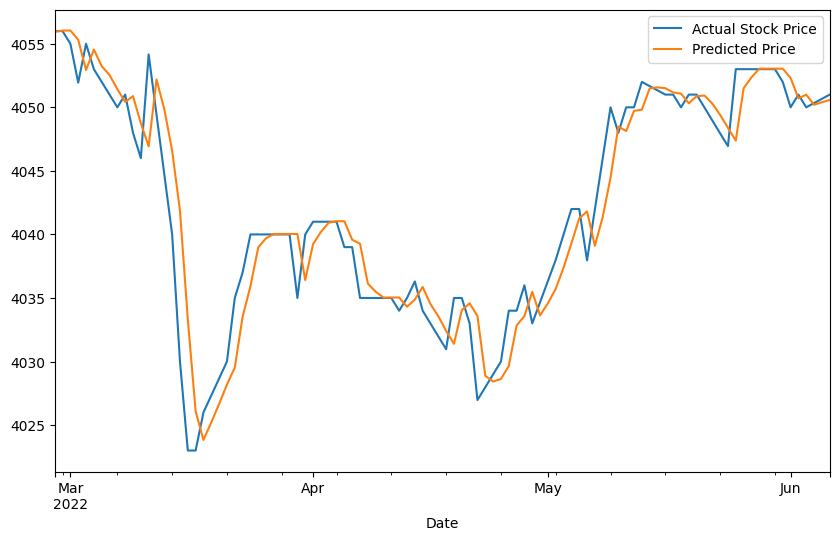

In [18]:
plt.figure(figsize=(10,6), dpi=100)
df2['Price'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

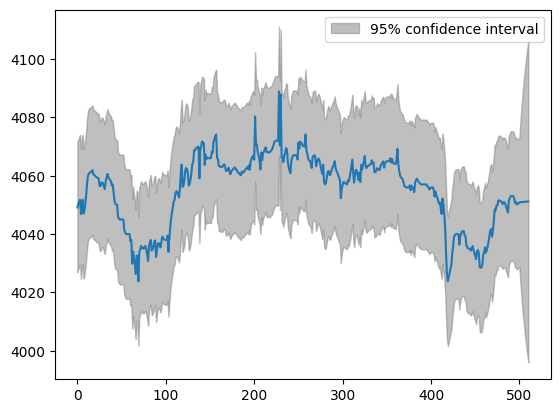

In [19]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

2.8953069166814656

In [21]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.8918592010502993

## Predicting Future 10 values

In [22]:
pred_future = model.predict(start=end,end=end+20)
pred_future

array([4050.57756339, 4050.91095337, 4050.93769519, 4050.98064324,
       4051.00600454, 4051.03434726, 4051.06386909, 4051.09272923,
       4051.12163692, 4051.15060669, 4051.17955404, 4051.20850049,
       4051.23744973, 4051.26639831, 4051.29534676, 4051.32429531,
       4051.35324385, 4051.38219239, 4051.41114092, 4051.44008946,
       4051.46903799])

In [23]:
import datetime
start_date = datetime.datetime(2022,6,6)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(21)]

In [24]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-06-06    4050.577563
2022-06-07    4050.910953
2022-06-08    4050.937695
2022-06-09    4050.980643
2022-06-10    4051.006005
2022-06-11    4051.034347
2022-06-12    4051.063869
2022-06-13    4051.092729
2022-06-14    4051.121637
2022-06-15    4051.150607
2022-06-16    4051.179554
2022-06-17    4051.208500
2022-06-18    4051.237450
2022-06-19    4051.266398
2022-06-20    4051.295347
2022-06-21    4051.324295
2022-06-22    4051.353244
2022-06-23    4051.382192
2022-06-24    4051.411141
2022-06-25    4051.440089
2022-06-26    4051.469038
dtype: float64

<AxesSubplot: xlabel='Date'>

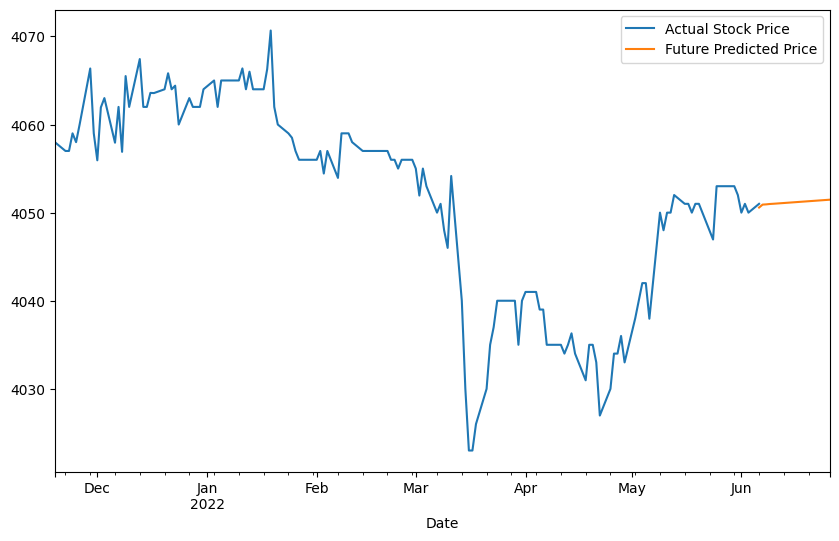

In [25]:
plt.figure(figsize=(10,6), dpi=100)
df2['Price'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)